In [1]:
import os
#os.environ[] 環境変数の取得
os.environ['KERAS_BACKEND'] = "tensorflow"
kerasBKED= os.environ["KERAS_BACKEND"]
print(kerasBKED)

tensorflow


In [2]:
os.chdir("C:\\Users\\tomohiko\\Autoencoder")

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import pickle
import numpy as np

In [3]:
#Cifar10を読み込む
batch_size = 32
num_clases=10
epochs = 5
saveDir = "C:\\Users\\tomohiko\\Zundamondetector\\TESTTESTimages3"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)
    print("Dirをつくりました")

In [4]:
#画像の水増しを使っての実験
#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import  ImageDataGenerator
%matplotlib inline

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\zundamon\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []

datagen = image.ImageDataGenerator(rotation_range=90)

#画像読み取り用
imgs = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    imgs.append(tempimagearray)
    
    #水増し用の部分
    x = tempimagearray[np.newaxis]
    gen = datagen.flow(x,batch_size=1)
    
    for i in range(2):
        imgs.append(next(gen)[0])
    #上下反転したものを加える
    flippedud_img = np.flipud(tempimagearray)
    imgs.append(flippedud_img)
    #左右反転したものを加える
    flippedlr_img = np.fliplr(tempimagearray)
    imgs.append(flippedlr_img)
    
    
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

imgs = np.array(imgs)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()
    

410
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_110.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_111.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_112.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_113.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_115.jpg

C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_223.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_225.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_23.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_230.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_233.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_234.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_236.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_237.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_238.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_241.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_243.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_245.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_246.jpg
(

C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_379.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_38.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_381.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_383.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_384.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_386.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_387.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_388.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_389.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_390.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_391.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_392.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_393.jpg
(

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_528.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_529.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_53.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_530.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_531.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_533.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_534.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_535.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_536.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_537.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_538.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだもん_539.jpg
画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\zundamon\ずんだも

<Figure size 100x41000 with 0 Axes>

In [5]:
print(len(imgs))
print(type(imgs[0]))
print(imgs[0].shape)

1945
<class 'numpy.ndarray'>
(128, 128, 3)


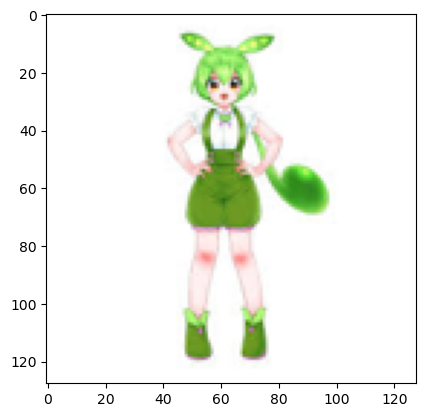

In [6]:
plt.imshow(imgs[0].astype('uint8'))
plt.show()

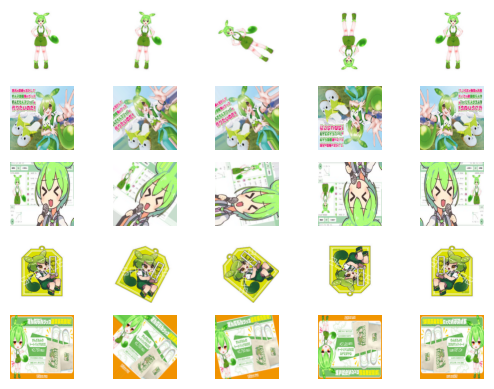

In [7]:
#画像を確認する
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.imshow(imgs[j].astype('uint8'))
    #cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)
    #plt.imshow(imgs[j])
    plt.axis('off')
plt.show()

In [8]:
#ここからオートエンコーダーを用いる
#旧ver、ミスアリ
input_img = Input(shape=(128, 128, 3))
x = Conv2D(256, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)#BatchNormalization()勾配消失、爆発を防ぐ
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = Conv2D(32, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [8]:
#ここからオートエンコーダーを用いる
#修正版、修正箇所、デコーダの5行目の()をencodedからxに変更、
#maxpooring、UpSampling2Dを適当な個所に追加
input_img = Input(shape=(128, 128, 3))
x = Conv2D(256, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)#BatchNormalization()勾配消失、爆発を防ぐ
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(32, (3, 3), padding='same')(x)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#x = Conv2D(32, (3, 3), padding='same')(encoded)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [9]:
model=Model(input_img,decoded)
#最適化関数を調整する
optimizer = Adam(learning_rate=0.01)

model.compile(optimizer="adam",loss='mse')#学習率の変更を行う

In [10]:
#なんかセーブする所(一旦虫)
es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
chkpt = saveDir + 'AutoEncoder_Cifar10_Deep_weights.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [11]:
#モデルをつくる(エポッチ数を5とする)
history = model.fit(imgs[:1361], imgs[:1361],
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(imgs[1361:1754], imgs[1361:1754]),
                    #callbacks=[es_cb, cp_cb],
                    shuffle=True)

Epoch 1/5
69/69 [==============================] - 488s 7s/step - loss: 35755.7539 - val_loss: 32070.7227
Epoch 2/5
69/69 [==============================] - 429s 6s/step - loss: 35746.7500 - val_loss: 32093.6211
Epoch 3/5
69/69 [==============================] - 393s 6s/step - loss: 35739.5586 - val_loss: 32099.8086
Epoch 4/5
69/69 [==============================] - 407s 6s/step - loss: 35733.0000 - val_loss: 32096.2695
Epoch 5/5
69/69 [==============================] - 368s 5s/step - loss: 35726.6094 - val_loss: 32090.7891


In [12]:
#最適化関数を調整する
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,loss='mse')#学習率の変更を行う

#モデルをつくる(エポッチ数を5とする)
history = model.fit(imgs[:1361], imgs[:1361],
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(imgs[1361:1754], imgs[1361:1754]),
                    #callbacks=[es_cb, cp_cb],
                    shuffle=True)

Epoch 1/5
69/69 [==============================] - 366s 5s/step - loss: 35722.9570 - val_loss: 32093.9258
Epoch 2/5
69/69 [==============================] - 354s 5s/step - loss: 35722.4219 - val_loss: 32093.7754
Epoch 3/5
69/69 [==============================] - 374s 5s/step - loss: 35721.5586 - val_loss: 32092.3301
Epoch 4/5
69/69 [==============================] - 362s 5s/step - loss: 35721.2031 - val_loss: 32091.4941
Epoch 5/5
69/69 [==============================] - 348s 5s/step - loss: 35720.4219 - val_loss: 32092.4551


In [20]:
score2 = model.evaluate(imgs[1754:1945],imgs[1754:1945],verbose=1)
print(score2)

6/6 [==============================] - 9s 1s/step - loss: 40060.5273
40060.52734375


In [14]:
model.save("C:\\Users\\tomohiko\\Zundamondetector\\zuntamonmizumashi5epoch2")

INFO:tensorflow:Assets written to: C:\Users\tomohiko\Zundamondetector\zuntamonmizumashi5epoch\assets


INFO:tensorflow:Assets written to: C:\Users\tomohiko\Zundamondetector\zuntamonmizumashi5epoch\assets


In [15]:
loadmodel = load_model("C:\\Users\\tomohiko\\Zundamondetector\\zuntamonmizumashi5epoch2")

1/1 [==============================] - 0s 199ms/step


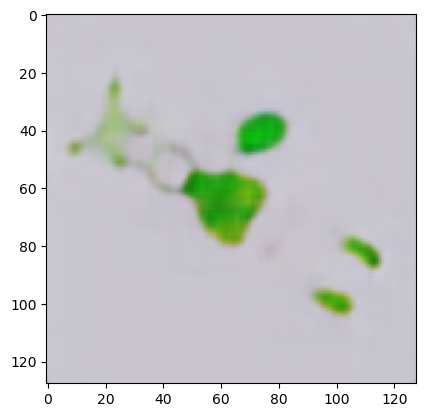

In [17]:
#ttt =  loadmodel.predict(imgs[0:1])
generated = model.predict(imgs[0:3])
plt.imshow(generated[0])
plt.imshow(generated[2])


In [18]:
#背景の読み取り
#その他の画像でもやってみる

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\background\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
haikeiimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    haikeiimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

haikeiimg = np.array(haikeiimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()
    

460
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_0.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_20.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_200.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_201.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_202.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_203.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_204.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_205.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_206.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_207.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_208.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_209.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_21.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencode

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_419.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_42.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_420.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_421.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_422.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_424.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_425.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_427.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_428.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_429.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_43.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\background\風景 写真_431.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencode

<Figure size 100x46000 with 0 Axes>

In [19]:
#人物の画像で実験を行う

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\human\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
humanrimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    humanrimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

humanrimg = np.array(humanrimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()

437
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoenc

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_269.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_27.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_270.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_271.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_272.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_273.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_274.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_275.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_276.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_277.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_28.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_281.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_282.jpg
(128, 128, 3)
C:\Users\tomo

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_583.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_587.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_59.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_591.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_596.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_597.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_6.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_60.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_600.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_601.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_602.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_61.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\human\人物 写真_611.jpg
(128, 128, 3)
C:\Users\tomohik

<Figure size 100x43700 with 0 Axes>

In [20]:
#アニメの絵で実験を行う
#人物の画像で実験を行う

#画像を一気に読み取る
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2

files =  glob.glob("C:\\Users\\tomohiko\\Autoencoder\\YahooZunda\\anime\\*")
#print(files[0])
#print(len[files])

xnum = len(files)

fig = plt
fig = plt.figure(figsize= (1,xnum))
ass = []
#画像読み取り用
animeimg = []
print(len(files))

for i, file in enumerate(files):
    print(file)
    #ass.append(fig.add_subplot(1+i,1,i+1))
    tempimage=Image.open(file)
    tempimage = tempimage.resize((128, 128))  # 画像をリサイズする
    tempimagearray = np.array(tempimage)
    
    # 形状が(128, 128,3)でない場合はスキップする
    if tempimagearray.shape !=(128,128,3):
        print("画像の形がいびつです" , file)
        continue
    
    
    tempimagecv2= cv2.cvtColor(tempimagearray,cv2.COLOR_BGR2RGB)
    print(tempimagecv2.shape)
    animeimg.append(tempimagearray)
    
   
    
    #plt.imshow(tempimagearray)
   # testimga = np.array(testimg)
#testimga = cv2.cvtColor(testimga,cv2.COLOR_BGR2RGB)

animeimg = np.array(animeimg)
#print(type(imgs[0]))
#print(imgs.shape)
#imgs = imgs.astype('float32')
plt.show()

676
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_1.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_10.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_100.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_101.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_102.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_103.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_104.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_105.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_106.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_107.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_108.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_109.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_11.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_27.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_270.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_271.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_272.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_273.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_274.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_275.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_276.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_277.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_278.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_279.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_28.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_280.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZund

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_445.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_446.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_447.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_448.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_449.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_45.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_450.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_451.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_452.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_453.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_454.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_455.jpg
画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_455.jpg
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_456.

(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_607.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_608.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_609.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_61.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_610.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_611.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_612.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_613.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_614.jpg
画像の形がいびつです C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_614.jpg
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_615.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_616.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_617.jpg
(128, 128, 3)
C:\Users\tomohiko\Autoencoder\YahooZunda\anime\アニメ_618.

<Figure size 100x67600 with 0 Axes>

In [21]:
#背景の画像を作ってみる
ttt =  loadmodel.predict(haikeiimg[0:1])
plt.imshow(ttt[0])

NameError: name 'loadmodel' is not defined

In [ ]:
#各スコアを確認し始める
#ずんだもん
#複数の画像を入れて、配列をcsvに保存する
zunscores = []
for i in range(1754,1945,1):
    sco = model.evaluate(imgs[i:i+1],imgs[i:i+1],verbose=1)
    zunscores.append(sco)

score3 = model.evaluate(imgs[1754:1945],imgs[1754:1945],verbose=1)
print(score3)

In [ ]:
#配列を保存する
zunscore2 = np.array(zunscores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\zunscores5epoch.npy",zunscore2)

In [ ]:
#配列を読み込む
loadzun = np.load("C:\\Users\\tomohiko\\Zundamondetector\\zunscores5epoch.npy")
print(len(loadzun))
print(loadzun[0])

In [ ]:
#平均　分散を求める
import statistics
import math
zundaave = statistics.mean(zunscore2)
zundastatistics = statistics.pvariance(zunscore2)#母数は190
print(zundaave)
print(zundastatistics)

In [ ]:
#背景
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
haikeiscores = []
for i in range(0,201,1):
    sco = model.evaluate(haikeiimg[i:i+1],haikeiimg[i:i+1],verbose=1)
    haikeiscores.append(sco)

score3 = model.evaluate(haikeiimg[0:1],haikeiimg[0:1],verbose=1)
print(score3)

#配列を保存する
haikeiscores = np.array(haikeiscores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\haikeiscore5epoch.npy",haikeiscores)


#平均　分散を求める
import statistics
import math
haikeiave = statistics.mean(haikeiscores)
haikeistatistics = statistics.pvariance(haikeiscores)#母数は190
print(haikeiave)
print(haikeistatistics)

In [22]:
#結果をCCSVに保存する
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
humanscores = []
for i in range(0,201,1):
    sco = model.evaluate(humanrimg[i:i+1],humanrimg[i:i+1],verbose=1)
    humanscores.append(sco)

score3 = model.evaluate(humanrimg[0:1],humanrimg[0:1],verbose=1)
print(score3)

#配列を保存する
humanscores = np.array(humanscores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\humanscores5epoch.npy",humanscores)


#平均　分散を求める
import statistics
import math
humanave = statistics.mean(humanscores)
humanstatistics = statistics.pvariance(humanscores)#母数は190
print(humanave)
print(humanstatistics)

1/1 [==============================] - 0s 72ms/step - loss: 32384.0625


1/1 [==============================] - 0s 78ms/step - loss: 20127.2812
20127.28125
27767.461530239427
157881464.84441516


In [23]:
#結果をCCSVに保存するアニメ絵
#背景のものを読み込む
#複数の画像を入れて、配列をcsvに保存する
animescores = []
for i in range(0,201,1):
    sco = model.evaluate(animeimg[i:i+1],animeimg[i:i+1],verbose=1)
    animescores.append(sco)

score3 = model.evaluate(animeimg[0:1],animeimg[0:1],verbose=1)
print(score3)

#配列を保存する
animescores = np.array(animescores)
np.save("C:\\Users\\tomohiko\\Zundamondetector\\animescores5epoch.npy",animescores)


#平均　分散を求める
import statistics
import math
animeave = statistics.mean(animescores)
animestatistics = statistics.pvariance(animescores)#母数は190
print(animeave)
print(animestatistics)

1/1 [==============================] - 0s 71ms/step - loss: 29040.2070


1/1 [==============================] - 0s 78ms/step - loss: 21202.8555
21202.85546875
24342.10253177472
112163653.92338401


In [24]:
#各平均、分散を並べて表示させる
print("ずんだもん")
print(zundaave)
print(zundastatistics)
print("背景")
print(haikeiave)
print(haikeistatistics)
print("人物")
print(humanave)
print(humanstatistics)
print("アニメ絵")
print(animeave)
print(animestatistics)

ずんだもん


NameError: name 'zundaave' is not defined